# Project 1

# Raport title: "Analysis of historic data of houses sold in USA"

# Description:

In [1]:
# LINK: https://www.kaggle.com/shivachandel/kc-house-data

In [2]:
# Kaggle dataset description:

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography.
The dataset consisted of 21 variables and 21613 observations. 

In [3]:
# Motivation and goals

I would like to check is it possible to predict house prices based on provided features - it is a regression task. So, the hypothesis is - "Selected machine learning models are able to predict house prices based features provided in dataset".
Standard data analysis will be performed in further part of the Notebook. I also would like to present results with matplotlib package.

# Import Python packages

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

# Data processing

In [5]:
# Load data from csv file into pandas dataframe
df = pd.read_csv(f'kc_house_data.csv')

In [6]:
# Let's look how data looks like
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [10]:
# There are no nan data, so we do not have to use data imputation
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
# Dataset contains 21 columns. Most of it is float or integer type. We've got here useless columns - id and date 
# (it's not helpful in our analysis).

Columns description (I'll describe only not obvious):
* id - advertisement / sell identifier
* date - date, when house was sold
* sqft_living - house square living footage
* sqft_lot - house square lot footage
* waterfront - house which has a view on waterfront
* view - has been viewed
* condition - how good a condition is 1 - 5
* grade - overall grade 1 - 13
* sqft_above - house square footage apart from the basement
* sqft_basement - house basement square footage
* lat / long - latitude and longitude coordinate
* sqft_living15 - living room area in 2015
* sqft_lot15 - lot size area in 2015

* price - it'll be a target variable

In [11]:
# Remove useles columns from dataframe (id and date)
df_clean = df.drop(['id', 'date'], axis = 1)

In [12]:
# Show few df rows after removing useles columns
df_clean.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7      1180.0              0      1955             0   
1     0          3      7      2170.0            400      1951          1991   
2     0          3      6       770.0              0      1933             0   
3     0          5      7      1050.0            910      1965             0   
4     0          3      8      1680.0              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

Text(0, 0.5, 'Number of houses')

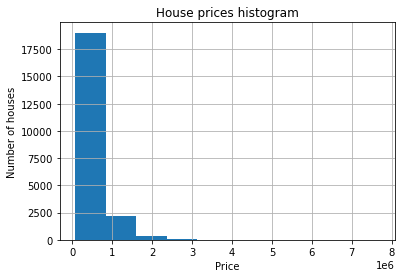

In [13]:
# Look closer to prices (histogram) - our target variable
df_clean.price.hist(by=None)
plt.title("House prices histogram")
plt.xlabel('Price')
plt.ylabel('Number of houses')

In [14]:
# Obervation: So, our histogram need to be "stretch" (we have to remove outlayers)

Removing outliers

In [15]:
# Now, we can remove outlayers base od 3 sigma method

# 3 sigma method
def r_3_sigma(data, column = 'price'):
    # Mean calculations for given column
    mean = data[column].mean()
    # Standard deviation
    std = data[column].std()
    # Thresholds
    sigma_up_thresh = 3 * std + mean
    sigma_down_thresh = mean - 3 * std
    # Removing outlayers
    dataFrame = data[(data[column] < sigma_up_thresh) & (data[column] > sigma_down_thresh)]
    
    return dataFrame

In [16]:
# Removing outlayers
df_noOutlayers = r_3_sigma(df_clean, 'price')

Text(0, 0.5, 'Number of houses')

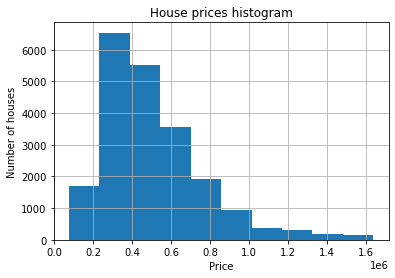

In [18]:
# Let's look again on histogram
# Look closer to prices (histogram)
df_noOutlayers.price.hist(by=None)
plt.title("House prices histogram")
plt.xlabel('Price')
plt.ylabel('Number of houses')

In [19]:
# Observetion: So, now it looks much better.

In [20]:
# Create a dataframes with independent variables (X) and dependent/target (Y)
df_X = df_noOutlayers.drop(['price'], axis = 1)
df_Y = df_noOutlayers['price']

In [21]:
# Split data into training and test. We have to use only training data for analysys, test data'll 
# be used just for check our model predictions.
# I assumed, that 25% of data will be a test data
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.25, random_state = 23)

# Data visualisation

In [22]:
# Concatenate training data to make the analysys easier
data_vis = pd.concat([x_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1, sort = False)

In [23]:
# We can look closer into data description datails
data_vis.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15905.000000  15905.000000  15905.000000  1.590500e+04  15905.000000   
mean       3.355926      2.087771   2032.872493  1.473960e+04      1.483904   
std        0.898597      0.736148    833.515032  4.048831e+04      0.536160   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.500000   1420.000000  5.010000e+03      1.000000   
50%        3.000000      2.250000   1900.000000  7.560000e+03      1.000000   
75%        4.000000      2.500000   2500.000000  1.044000e+04      2.000000   
max       11.000000      7.500000   7480.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  15905.000000  15905.000000  15905.000000  15905.000000  15904.000000   
mean       0.004275      0.206036      3.409368      7.610626   1750.088405   
std        0.065249      0.705942      0.652615      1.107740    767.231900   
min        0.000000      0.000000      1.000000      1.000000    290.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1540.000000   
75%        0.000000      0.000000      4.000000      8.000000   2170.000000   
max        1.000000      4.000000      5.000000     12.000000   7320.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   15905.000000  15905.000000  15905.000000  15905.000000  15905.000000   
mean      282.777177   1970.924804     81.422131  98078.370890     47.559974   
std       427.195558     29.247309    394.791828     53.678149      0.139713   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.000000     47.467300   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571400   
75%       550.000000   1996.000000      0.000000  98118.000000     47.679800   
max      2810.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         price  
count  15905.000000   15905.000000   15905.000000  1.590500e+04  
mean    -122.214233    1960.476768   12634.140899  5.076879e+05  
std        0.141539     652.984026   27139.657620  2.595991e+05  
min     -122.519000     399.000000     651.000000  7.800000e+04  
25%     -122.330000    1480.000000    5080.000000  3.200000e+05  
50%     -122.232000    1820.000000    7570.000000  4.480000e+05  
75%     -122.125000    2330.000000    9990.000000  6.260000e+05  
max     -121.315000    5790.000000  858132.000000  1.640000e+06

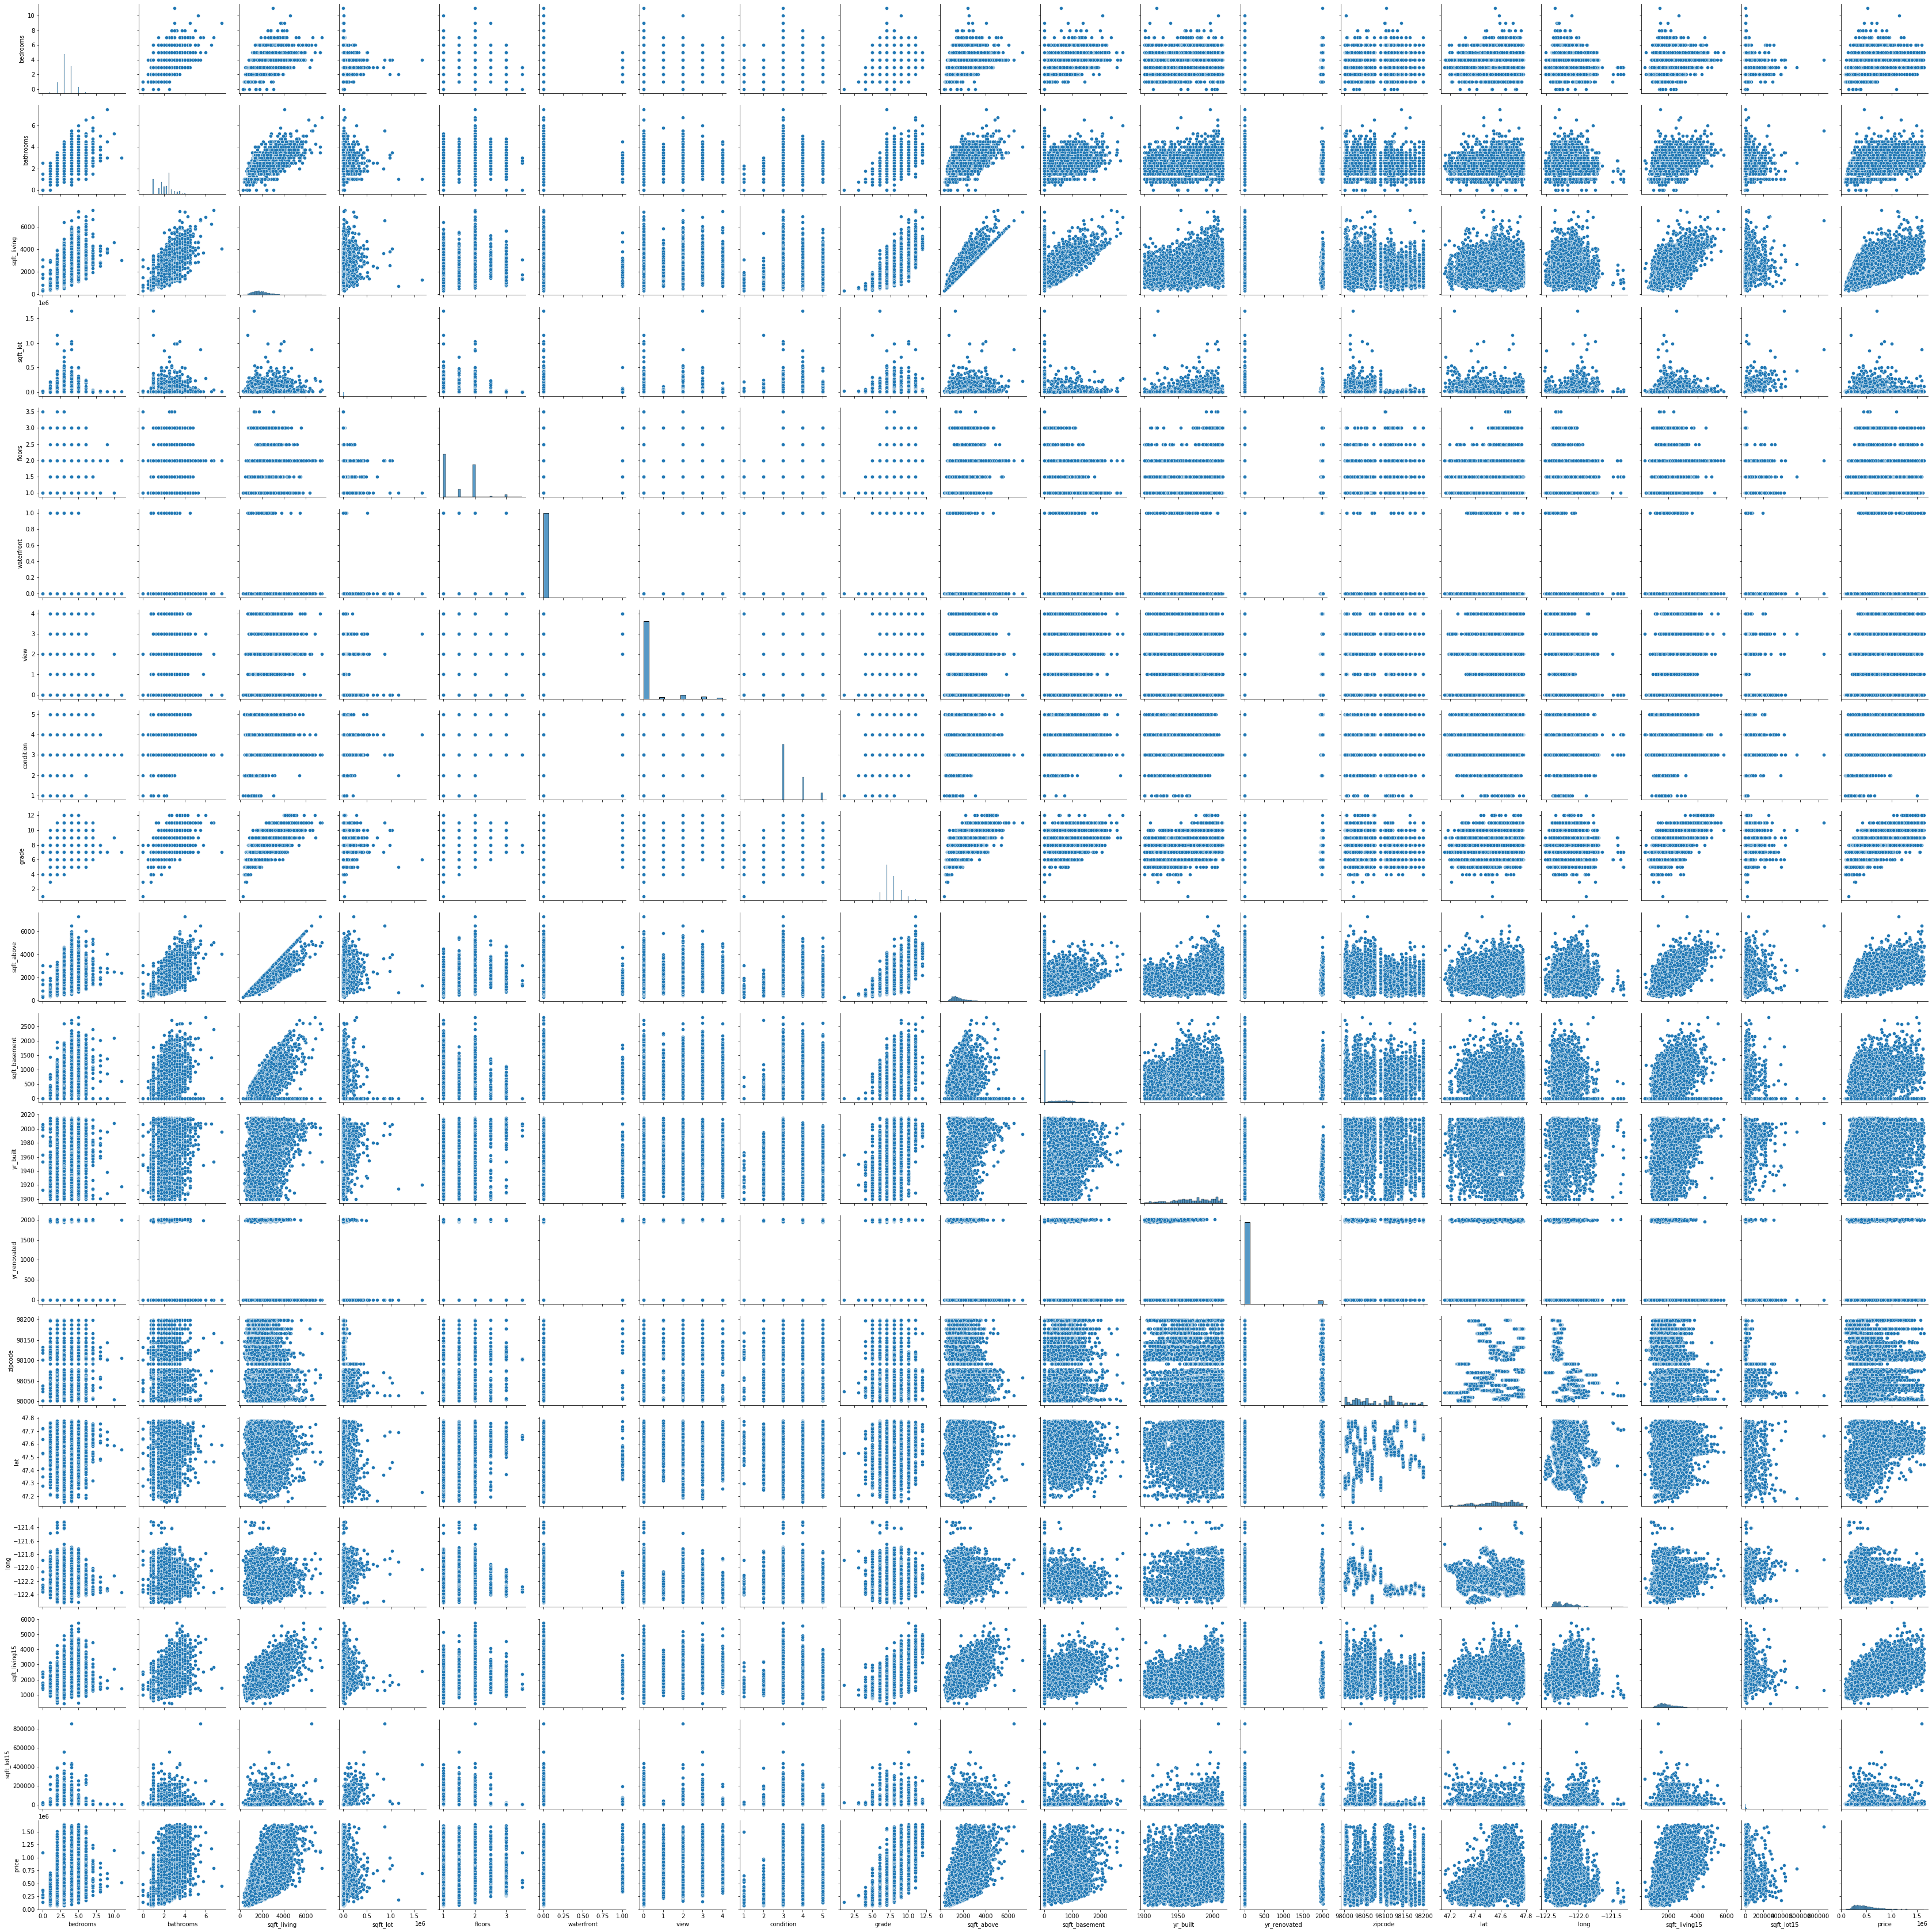

In [24]:
# We can also make a paiplot to look throu data layout and relationships
sns.pairplot(data_vis, kind="scatter")
plt.show()

In [25]:
# Observation: We can notice, that there are some approximately linear dependent 
# variables - for example sqrt_above - sqft_living or sqft_living - bathrooms

Text(0.5, 1.0, 'Correlation matrix')

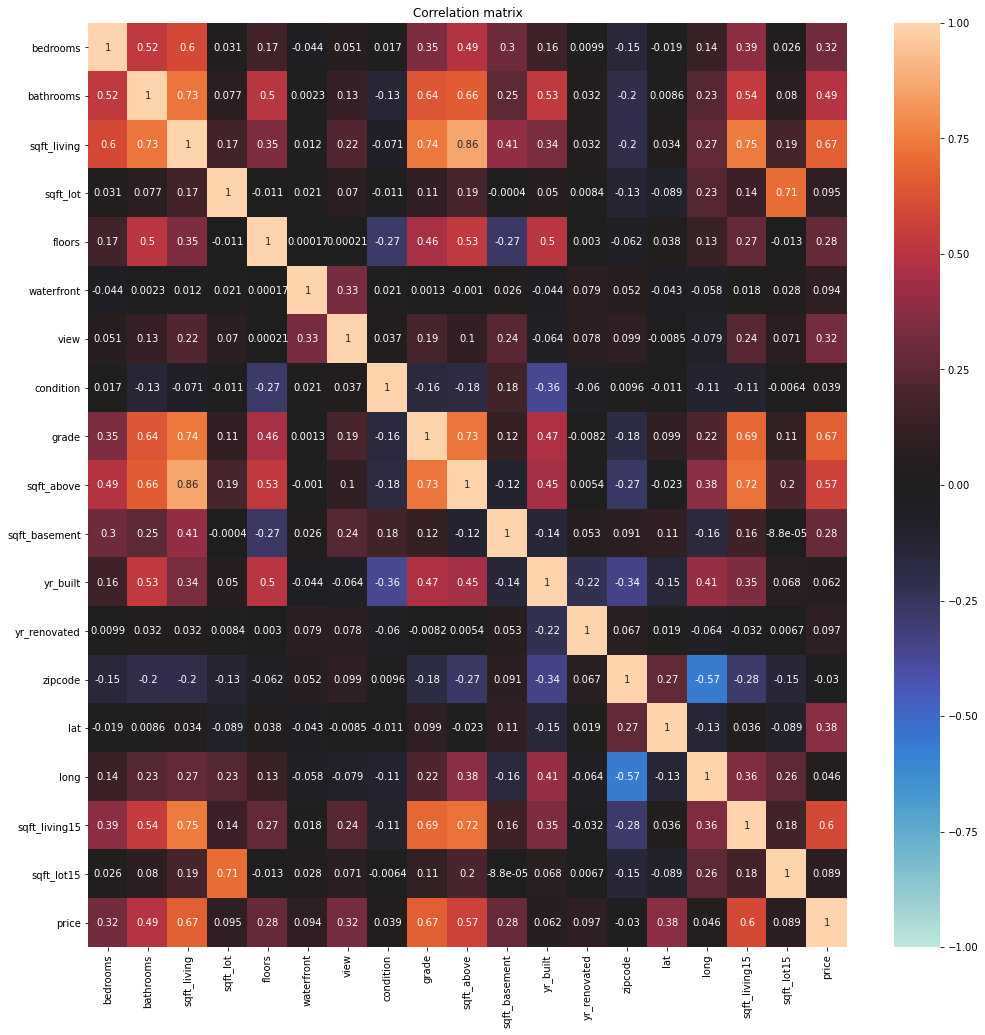

In [26]:
# Next step is to look into correlation between data features.
correlation = data_vis.corr()
plt.figure(figsize=(17, 17))
sns.heatmap(correlation, vmax = 1, vmin = -1, annot = True, center = 0)
plt.title('Correlation matrix')

In [27]:
# Observations :
# We can see which features are correlated with an output ('price'). Positively high correlated features are 
# grade-price, sqft_living-price and some others (orange colour)
# There is a possibility to remove pairs of high correlated features (redundant), but as we can see - max corr value module 
# are not really big in general.
# Correlation values proved visual assessment of linear dependent between described variables.

In [31]:
# Removal of redundant variables (correlation module grater than threshold) - analyzing just x_train!
# Let's assume a corr threshold will be 0.8
# Correlation module
corr_matrix = x_train.corr().abs()
# Threshold - features with correlation values with 
threshold = 0.80
# Symmetric matrix (triangular upper is enough)
upper_triu = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
triu_columns = upper_triu.columns
# If feature corr value grater than threshold - this feature will be removed
high_correlated = [column for column in triu_columns if any(upper_triu[column] > threshold)]

# High correlated features removal from training and testing data
x_train = x_train.drop(x_train[high_correlated], axis = 1)
x_test = x_test.drop(x_test[high_correlated], axis = 1)

In [33]:
# There were only one high correlated feature - sqft_above (correlated 0.86 with sqft_living)

In [34]:
high_correlated

['sqft_above']

# Models

Polynomial and multiple regression, decision tree, random forest and xgboost regressor has been chosen. After each model creation, fit and prediction - I will present graphical layout of real test and predicted data. I also provide a metrics such as R2, and RMSE for better model comparison. An interpretation and choosing the best one will be performed in Conclusion section.

## Polynomial regression

In [35]:
# Degree
degree = 3
# Pipeline ()
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Start training
model_poly.fit(x_train.values, y_train.values)
# Predict prices for train data
poly_preds_train = model_poly.predict(x_train.values)
# Predict prices for test data
poly_preds = model_poly.predict(x_test.values)

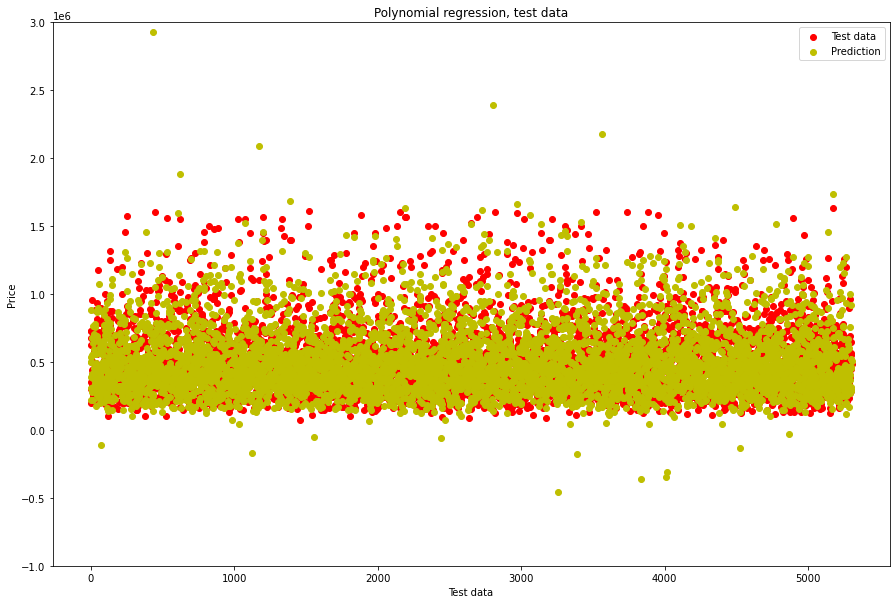

In [36]:
# Plot results
plt.figure(figsize=(15,10))
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(poly_preds))), poly_preds, c='y')
plt.title('Polynomial regression, test data')
plt.xlabel('Test data')
plt.ylabel('Price')
plt.ylim(-0.1e7, 0.3e7)
plt.legend(['Test data', 'Prediction'])

In [37]:
# Matrics:
# R2 info
print('Polynomial regression, R2 score = ' + str(r2_score(y_test, poly_preds)))
# mean_squared_error (for train and test data)
print('Polynomial regression, train data RMSE: %.2f' % mean_squared_error(y_train, poly_preds_train, squared=False))
print('Polynomial regression, test data RMSE: %.2f' % mean_squared_error(y_test, poly_preds, squared=False))

Polynomial regression, R2 score = 0.1419042698272075
Polynomial regression, train data RMSE: 108172.10
Polynomial regression, test data RMSE: 239446.07


## Multiple regression 

In [38]:
# Create a model
sklearn_multiple = LinearRegression()
# Start training
sklearn_multiple.fit(x_train.values, y_train.values)
# Predict prices for train data
multiple_preds_train = sklearn_multiple.predict(x_train.values)
# Predict prices for test data
multiple_preds = sklearn_multiple.predict(x_test.values)

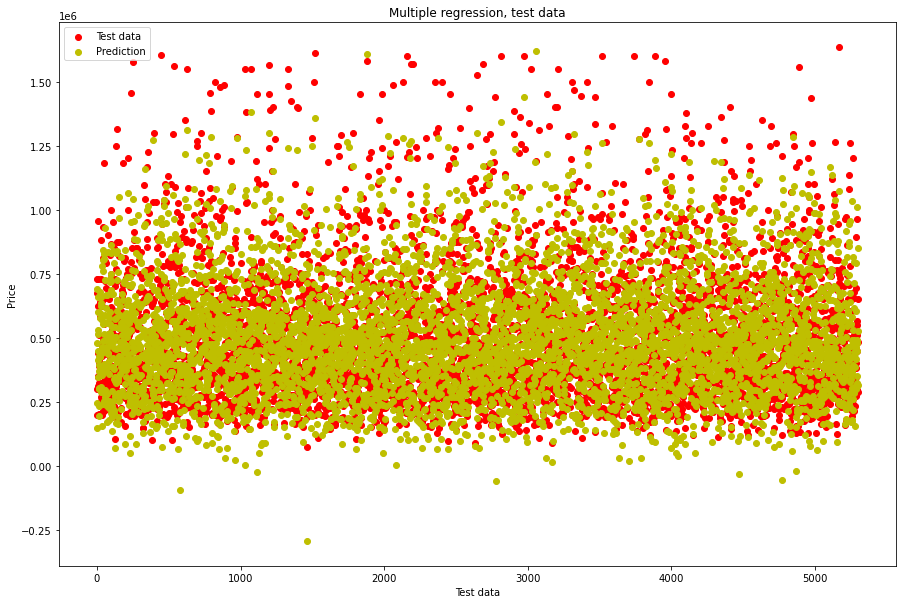

In [39]:
# Plot results
plt.figure(figsize=(15,10))
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(multiple_preds))), multiple_preds, c='y')
plt.title('Multiple regression, test data')
plt.xlabel('Test data')
plt.ylabel('Price')
plt.legend(['Test data', 'Prediction'])

In [40]:
# Matrics:
# R2 info
print('Multiple regression, R2 score = ' + str(r2_score(y_test, multiple_preds)))
# mean_squared_error (for train and test data)
print('Multiple regression, train data RMSE: %.2f' % mean_squared_error(y_train, multiple_preds_train, squared=False))
print('Multiple regression, test data RMSE: %.2f' % mean_squared_error(y_test, multiple_preds, squared=False))

Multiple regression, R2 score = 0.7136522789216837
Multiple regression, train data RMSE: 139336.35
Multiple regression, test data RMSE: 138320.55


## Decision tree regressor 

In [41]:
# Create a model - I checked many max_depth values and the best one has been chosen (based on highest R2 value)
best_depth = 1
bestR2 = 0

for i in range(1, 30):
    tree_regression = DecisionTreeRegressor(max_depth = i)
    # Start training
    tree_regression.fit(x_train, y_train)
    # Predict prices for train data
    tree_preds_train = tree_regression.predict(x_train.values)
    # Predict prices for test data
    tree_preds = tree_regression.predict(x_test.values)
    
    # Select best_depth
    if(r2_score(y_test, tree_preds) > bestR2):
        best_depth = i
        bestR2 = r2_score(y_test, tree_preds)

print('Best depth selected in loop equal to: '+str(best_depth))

Best depth selected in loop equal to: 10


In [42]:
# Create model with best_depth parameter
tree_regression = DecisionTreeRegressor(max_depth = best_depth)
# Start training
tree_regression.fit(x_train, y_train)
# Predict prices for train data
tree_preds_train = tree_regression.predict(x_train.values)
# Predict prices for test data
tree_preds = tree_regression.predict(x_test.values)

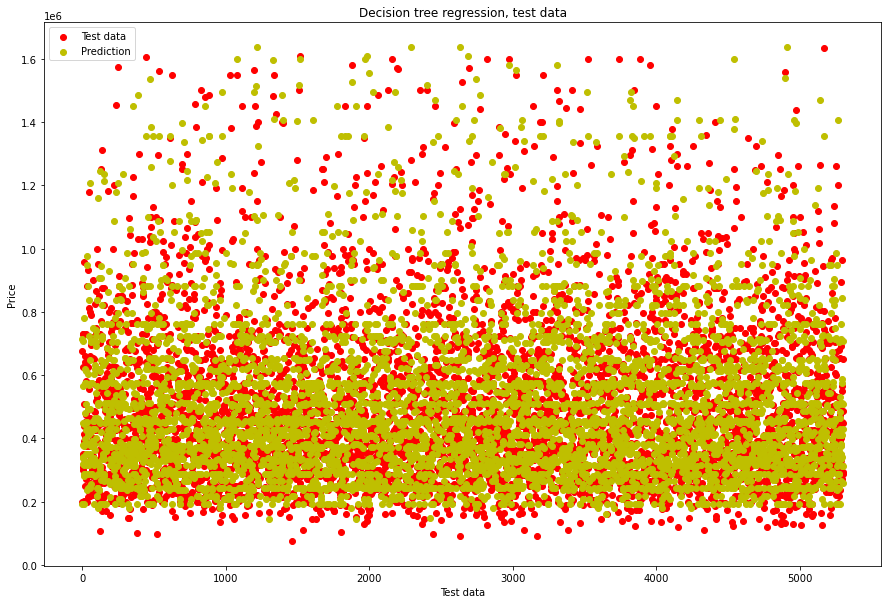

In [43]:
# Plot results
plt.figure(figsize=(15,10))
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(tree_preds))), tree_preds, c='y')
plt.title('Decision tree regression, test data')
plt.xlabel('Test data')
plt.ylabel('Price')
plt.legend(['Test data', 'Prediction'])

In [44]:
# Matrics:
# R2 info
print('Decision tree regression, R2 score = ' + str(r2_score(y_test, tree_preds)))
# mean_squared_error (for train and test data)
print('Decision tree regression, train data RMSE: %.2f' % mean_squared_error(y_train, tree_preds_train, squared=False))
print('Decision tree regression, test data RMSE: %.2f' % mean_squared_error(y_test, tree_preds, squared=False))

Decision tree regression, R2 score = 0.7890770201887907
Decision tree regression, train data RMSE: 85826.98
Decision tree regression, test data RMSE: 118713.96


## Random forest regressor 

In [45]:
# Create a model
forest_regression = RandomForestRegressor()
# Start training
forest_regression.fit(x_train, y_train)
# Predict prices for train data
forest_preds_train = forest_regression.predict(x_train.values)
# Predict prices for test data
forest_preds = forest_regression.predict(x_test.values)

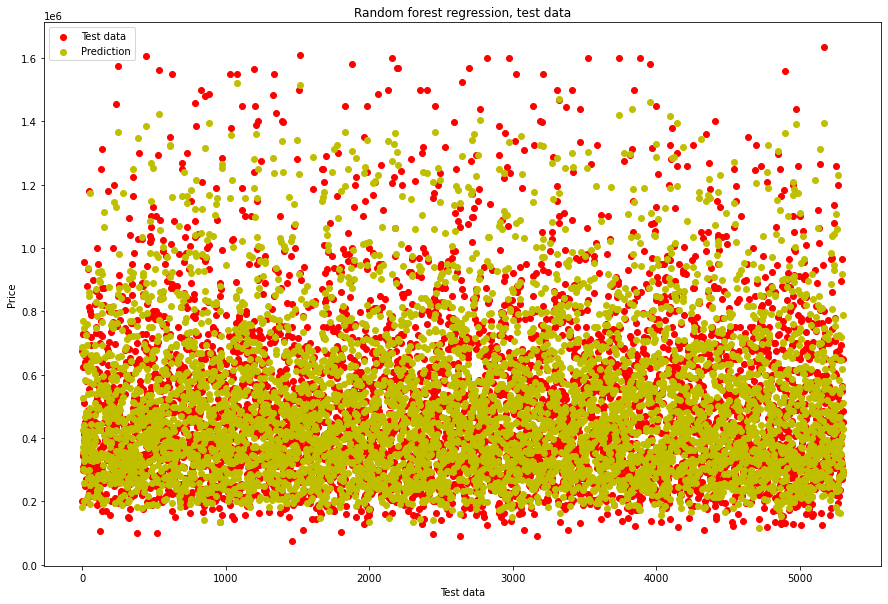

In [46]:
# Plot results
plt.figure(figsize=(15,10))
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(forest_preds))), forest_preds, c='y')
plt.title('Random forest regression, test data')
plt.xlabel('Test data')
plt.ylabel('Price')
plt.legend(['Test data', 'Prediction'])

In [47]:
# Matrics:
# R2 info
print('Random forest regression, R2 score = ' + str(r2_score(y_test, forest_preds)))
# mean_squared_error (for train and test data)
print('Random forest regression, train data RMSE: %.2f' % mean_squared_error(y_train, forest_preds_train, squared=False))
print('Random forest regression, test data RMSE: %.2f' % mean_squared_error(y_test, forest_preds, squared=False))

Random forest regression, R2 score = 0.8679452576740798
Random forest regression, train data RMSE: 36008.17
Random forest regression, test data RMSE: 93932.71


## XGBoost regressor

In [50]:
# Create a model
xgb_regressor = xgboost.XGBRegressor()
# Start training
xgb_regressor.fit(x_train.values, y_train.values)
# Predict prices for train data
xgbreg_preds_train = xgb_regressor.predict(x_train.values)
# Predict prices for test data
xgbreg_preds = xgb_regressor.predict(x_test.values)

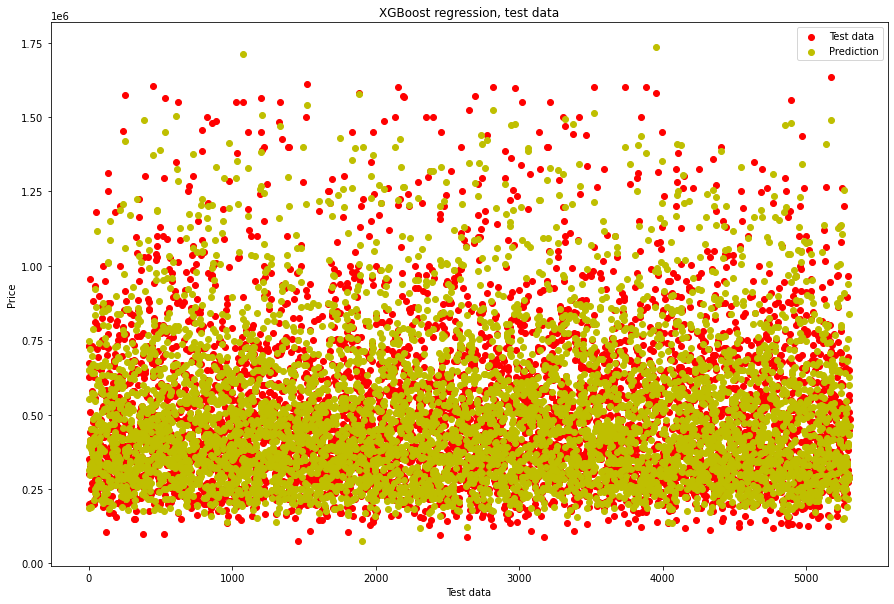

In [51]:
# Plot results
plt.figure(figsize=(15,10))
plt.scatter(list(range(len(y_test))), y_test, c='r')
plt.scatter(list(range(len(xgbreg_preds))), xgbreg_preds, c='y')
plt.title('XGBoost regression, test data')
plt.xlabel('Test data')
plt.ylabel('Price')
plt.legend(['Test data', 'Prediction'])

In [53]:
# Matrics:
# R2 info
print('XGBoost regression, R2 score = ' + str(r2_score(y_test, xgbreg_preds)))
# mean_squared_error (for train and test data)
print('XGBoost regression, train data RMSE: %.2f' % mean_squared_error(y_train, xgbreg_preds_train, squared=False))
print('XGBoost regression, test data RMSE: %.2f' % mean_squared_error(y_test, xgbreg_preds, squared=False))

XGBoost regression, R2 score = 0.8782031951144145
XGBoost regression, train data RMSE: 52559.86
XGBoost regression, test data RMSE: 90210.65


# Conclusion

* Low error on training data did not always result in low error on test data,
* The proposed steps used in the project allowed me to analyze and build a model from scratch - first getting familiar with the data, then checking for correlations, then selecting features and building models,
* I checked two matrics - R2 and mean squared error for each model,
* XGBoost regressor turned out the best model (comparable to random forest),
* We can see the advantage of random forest (build with many decision trees) over decision trees (decision trees are fragile for overfitting - we can slightly see it on decision tree prediction plot), 
* The worst model (highest error values) was polynomial regression,
* Each step of the analysis was supported by plots or comments/observations,
* The assumptions of each model were satisfied - I provided proper input data and needed parameters.
* Hypothesis: "Selected machine learning models are able to predict house prices based features provided in dataset" - has been proved. I was able to predict house prices with an error which depends on used model. 
* Mean squared error equal to 90210 (for best model - xgboost regressor) was not really high in case on the range of prices which were considered during analysis.